<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [18]:
def sum_prod(X, V):
    result = np.zeros_like(V[0])

    for i in range(len(X)):
        result += np.dot(X[i], V[i])
    return result

X1 = [np.array([[1, 2],[3, 4]]),
     np.array([[5, 6],[7, 8]])]

V1 = [np.array([[1],[2]]),
     np.array([[3],[4]])]

X2 = [np.array([[1, 2],[3, 4]]),
     np.array([[1, 2],[3, 4]])]

V2 = [np.array([[1],[2]]),
     np.array([[1],[2]])]

assert np.array_equal(sum_prod(X1,V1), np.array([[44], [64]]))
assert np.array_equal(sum_prod(X2,V2), np.array([[10], [22]]))

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [41]:
def binarize(M, threshold=0.5):
    return np.where(M>threshold, 1,0)

M1 = np.array([[0.8, 0.1],
              [0.2, 0.5]])

M2 = np.array([[0.2, 0.1],
              [0.2, 0.6]])

assert np.array_equal(binarize(M1), np.array([[1,0], [0,0]]))
assert np.array_equal(binarize(M2), np.array([[0,0], [0,1]]))

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [97]:
def unique_rows(mat):
    return [set(row) for row in mat]

def unique_columns(mat):
    return [set(col) for col in mat.T]

mat = np.array([[1, 2, 2],
                [4, 2, 6],
                [7, 8, 9]])

assert np.array_equal(unique_rows(mat), [{1, 2}, {2, 4, 6}, {8, 9, 7}])

assert np.array_equal(unique_columns(mat), [{1, 4, 7}, {8, 2}, {9, 2, 6}])

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

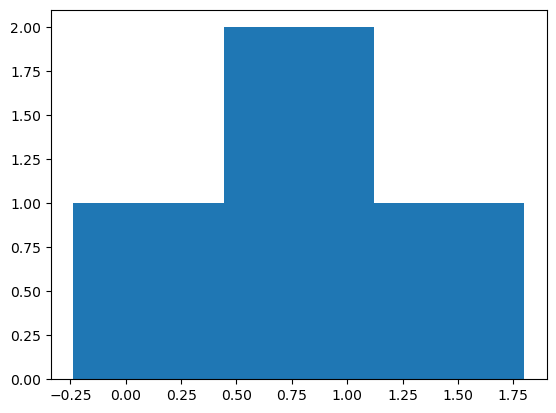

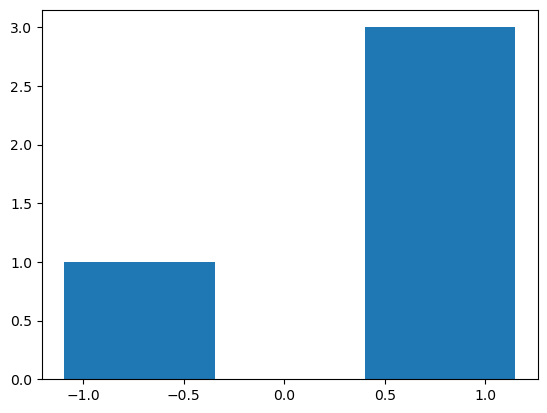

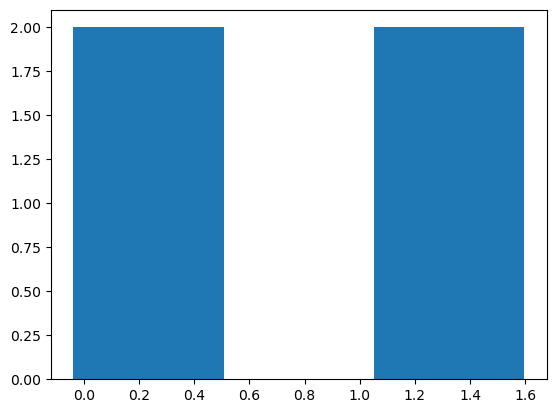

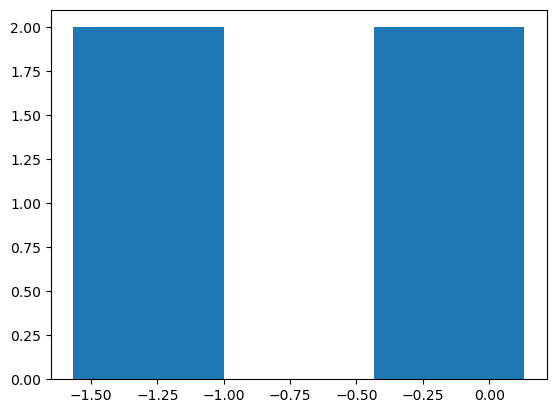

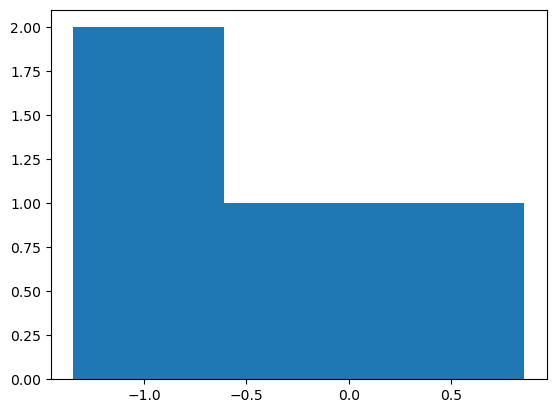

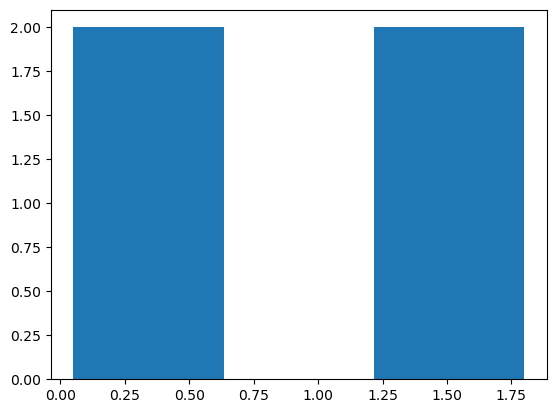

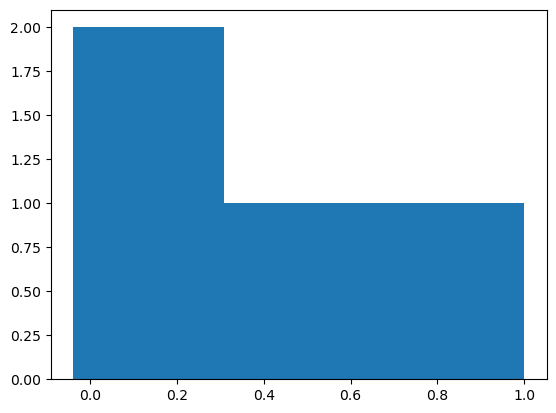

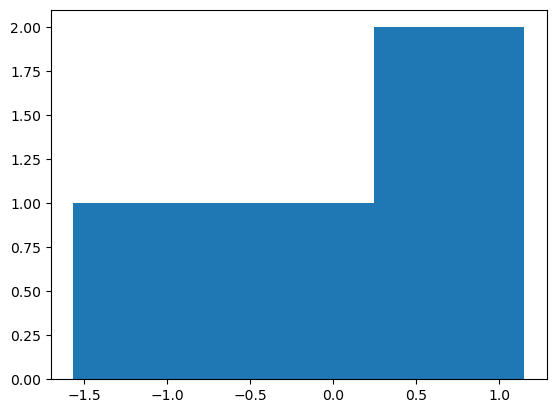

(array([ 0.72644981,  0.42128661,  0.67375915, -0.68299582]),
 array([0.53892518, 0.80069063, 0.48168925, 0.60596317]),
 array([-0.38408869,  1.01888741,  0.39463441,  0.10906663]),
 array([0.78970458, 0.50832776, 0.15785628, 1.24373851]))

In [241]:
def rand_matrix(m: int, n: int):
    matrix = np.random.normal(size=(m, n))
    column_means = np.mean(matrix, axis=0)
    column_vars = np.var(matrix, axis=0)
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)

    for i in range(n):
        plt.hist(matrix[:, i], "auto")
        plt.show()

    for i in range(m):
        plt.hist(matrix[i, :], "auto")
        plt.show()
    return column_means, column_vars, row_means, row_vars

rand_matrix(4,4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [137]:
def chess(m, n, a, b):
    board = np.full((m, n), b)
    board[::2, ::2] = a
    board[1::2, 1::2] = a
    return board

assert np.array_equal(chess(5, 5, 1, 0), np.array([[1, 0, 1, 0, 1],
                                                   [0, 1, 0, 1, 0],
                                                   [1, 0, 1, 0, 1],
                                                   [0, 1, 0, 1, 0],
                                                   [1, 0, 1, 0, 1]]))

assert np.array_equal(chess(1, 1, 1, 2), np.array([[1]]))

assert np.array_equal(chess(2, 2, 1, 2), np.array([[1,2],
                                                   [2,1]]))

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

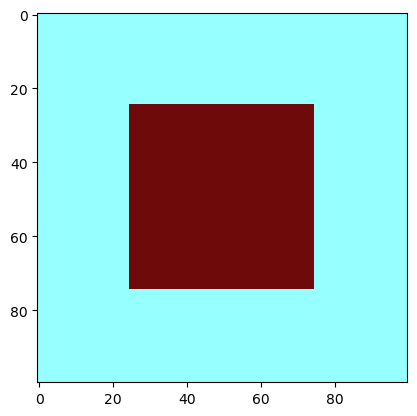

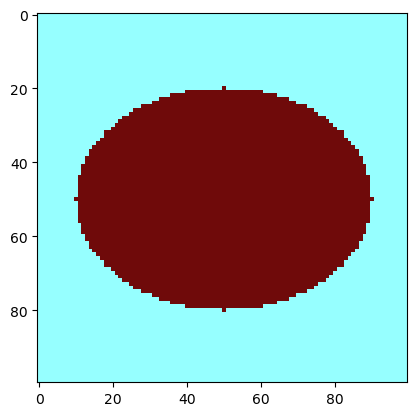

In [179]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.full((m, n, 3), background_color)
    
    x1, x2 = (n - a) // 2, (n + a) // 2
    y1, y2 = (m - b) // 2, (m + b) // 2
    img[y1:y2, x1:x2] = rectangle_color

    plt.imshow(img)
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = np.full((m, n, 3), background_color)
    
    n0, m0 = n // 2, m // 2
    y, x = np.ogrid[-n0:n0, -m0:m0]

    mask = x*x/(a*a) + y*y/(b*b) <= 1
    img[mask] = ellipse_color

    plt.imshow(img)
    plt.show()

draw_rectangle(50, 50, 100, 100, [111, 10, 10], [150, 255, 255])
draw_ellipse(40, 30, 100, 100, [111, 10, 10], [150, 255, 255])

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [222]:
def calculate_time(time: np.array, p: int):
    mean = np.mean(time)
    variance = np.var(time)
    std_dev = np.std(time)
    local_maxima = (np.diff(np.sign(np.diff(time))) < 0).nonzero()[0] + 1
    local_minima = (np.diff(np.sign(np.diff(time))) > 0).nonzero()[0] + 1
    moving_average = np.convolve(time, np.ones(p) / p, 'valid')
    
    return mean, variance, std_dev, local_maxima, local_minima, moving_average

a = calculate_time(np.array([1, 2, 3, 1, 2, 3, 2, 0, 1]), 3)

assert np.isclose(a[0], 1.666666666)
assert np.isclose(a[1], 0.888888888)
assert np.isclose(a[2], 0.942809041)
assert np.array_equal(a[3], (np.array([2, 5])))
assert np.array_equal(a[4], (np.array([3, 7])))
#assert np.array_equal(a[5], )  

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [230]:
def one_hot_encoding(V) -> np.array:
    matrix = np.zeros((len(V),len(V)))

    for row in range(len(V)):
        matrix[row, V[row]] = 1
    return matrix

np.array([0, 2, 3, 0])